<h1><center>Data Visualization Lab</center></h1>

## Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." -- An IBM-er.

In this lab, you will be helping the Telcos to understand their customer churn problems with your analytical skills and thus help to build focused customer retention programs. 


## Dataset

Dataset name: __Telco_Customer_Churn.csv__

This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data. We will be using Python and Seaborn library to plot and analyze the data.

The data set includes information about:

+ Customers who left within the last month – the column is called Churn
+ Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers – gender, age range, and if they have partners and dependents


## Section 1: Data Preparation

### Import the necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Read the data from the given URL into a DataFrame named `telco`.

In [12]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/Telco_Customer_Churn.csv'

In [13]:
telco = pd.read_csv(url)



### Show the top 5 rows of the DataFrame

In [14]:
telco.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Display all the column names from the DataFrame

In [15]:
telco.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Show the total number of missing data for each column

In [16]:
telco.isnull().sum()



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Fill in the missing values with the average `TotalCharges`. Ensure the change is `inplace`.

In [17]:
avg_TotalCharges = telco['TotalCharges'].mean()

telco['TotalCharges'].fillna(value = avg_TotalCharges, inplace = True)


In [18]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Section 2: Data Visualization

### Show the counts for "Yes"s and "No"s in the `Churn` column.

<AxesSubplot:xlabel='Churn', ylabel='count'>

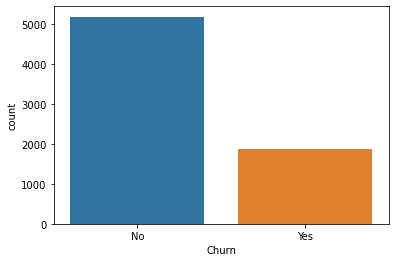

In [20]:
sns.countplot(data = telco, x = 'Churn')



### Show a distribution of the `MonthlyCharges` data with 30 bins, and break down the color based off of `Churn`. 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

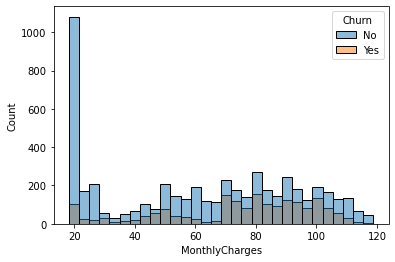

In [22]:
sns.histplot(data = telco, bins = 30, x = 'MonthlyCharges', hue = 'Churn')



### Show a pairwise plot with all numeric columns from the DataFrame. Then color-code with `Churn`.

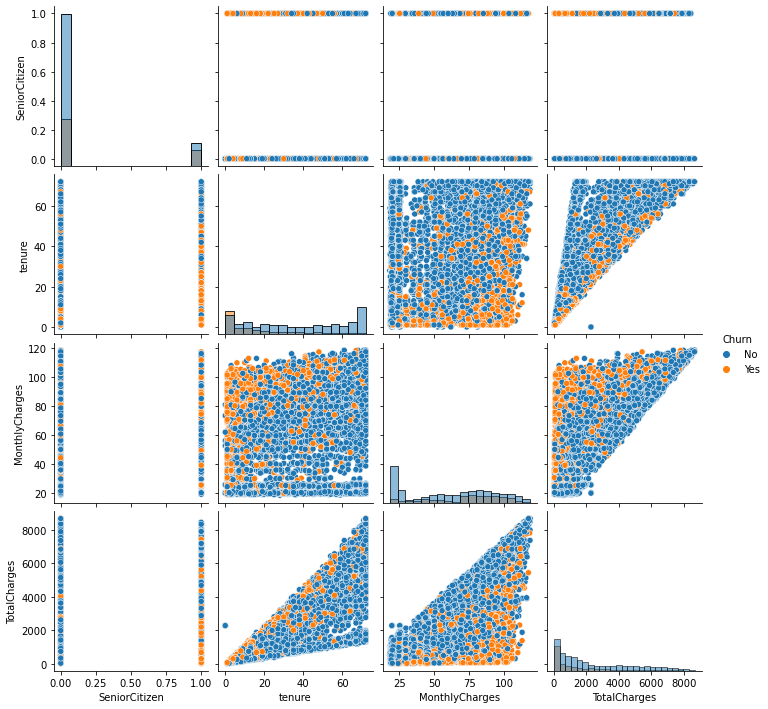

In [24]:
sns.pairplot(data = telco, hue = 'Churn', diag_kind = 'hist')



### Show a box plot of customer `MonthlyCharges` versus `MultipleLines`. Then color-code based off of `Churn`.

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

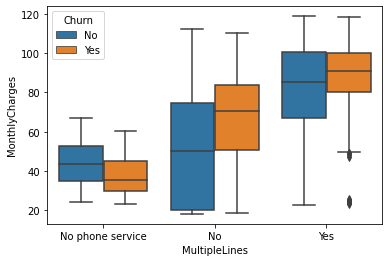

In [25]:
sns.boxplot(data = telco, x = 'MultipleLines', y = 'MonthlyCharges', hue = 'Churn')



### Show a violin plot of customer `Contract` versus `MonthlyCharges`. Then color-code based off of `Churn`.

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

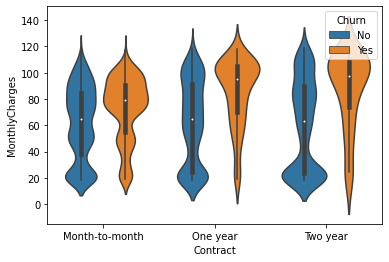

In [26]:
sns.violinplot(data = telco, x = 'Contract', y = 'MonthlyCharges', hue = 'Churn')



### Come up with another meaningful visualization graph and write down your observations. 

<AxesSubplot:ylabel='PaymentMethod'>

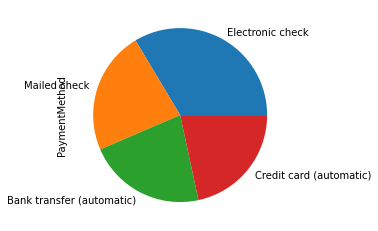

In [41]:
telco['PaymentMethod'].value_counts().plot(kind = 'pie')


This pie graph shows that a majority of people will use paperless payment methods to pay their monthly charges, which might tell a company to market paperless billing to their customers who still use paper checks. This could result in overall less money spent by the customer(no stamp cost) and less time to recieve money for the company(the company would not have to wait for a check to be cashed)